In [18]:
!pip install fiona
!pip install pyproj
!pip install rtree
!pip install shapely
!pip install pyogrio
!pip install packaging
!pip install numpy
!pip install geopandas
!pip install matplotlib
!pip install mapclassify
!pip install folium

     |████████████████████████████████| 8.7 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 58.4 MB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 3.6 MB/s eta 0:00:011


In [22]:
from src.enum.identifiers.Ride import Ride
from src.enum.identifiers.Net import Net
from src.enum.setup.Paths import Paths
from src.enum.setup.Dataset import Dataset
from src.enum.setup.FileFormat import FileFormat
from src.enum.setup.FileName import FileName
from src.enum.setup.City import City
from src.utils import utils
import geopandas as gpd
import json
import os

In [23]:
input_absolute_path_to_file = utils.generate_absolute_path_to_file(
    Paths.TAZ,
    FileName.TAZ_BOUNDARY,
    FileFormat.GEOJSON,
    Dataset.SFCTA,
    City.SAN_FRANCISCO
)
gdf = gpd.read_file(input_absolute_path_to_file)

In [24]:
gdf[Net.AREA.value] = gdf.area
gdf[Net.BOUNDARY.value] = gdf.boundary
gdf[Net.CENTROIDS.value] = gdf.centroid

/var/folders/lk/f9788htd3zz7ym_g3009qc0w0000gn/T/ipykernel_7643/1657571606.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf[Net.AREA.value] = gdf.area
/var/folders/lk/f9788htd3zz7ym_g3009qc0w0000gn/T/ipykernel_7643/1657571606.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf[Net.CENTROIDS.value] = gdf.centroid


In [25]:
gdf.head()

,TAZ,geometry,area,boundary,centroids
0,1,"MULTIPOLYGON (((-122.41623 37.70833, -122.4159...",0.000009,"MULTILINESTRING ((-122.41623 37.70833, -122.41...",POINT (-122.41369 37.70949)
1,2,"MULTIPOLYGON (((-122.46892 37.70823, -122.4684...",0.000017,"MULTILINESTRING ((-122.46892 37.70823, -122.46...",POINT (-122.46369 37.70921)
2,3,"MULTIPOLYGON (((-122.42455 37.71010, -122.4241...",0.000013,"MULTILINESTRING ((-122.42455 37.71010, -122.42...",POINT (-122.42099 37.70978)
3,4,"MULTIPOLYGON (((-122.46091 37.71059, -122.4594...",0.000015,"MULTILINESTRING ((-122.46091 37.71059, -122.45...",POINT (-122.45687 37.70948)
4,5,"MULTIPOLYGON (((-122.42008 37.70833, -122.4200...",0.000010,"MULTILINESTRING ((-122.42008 37.70833, -122.42...",POINT (-122.41665 37.70984)


In [26]:
gdf.shape

(969, 5)

In [27]:
gdf.explore(Net.AREA, legend=False)

<AxesSubplot:>

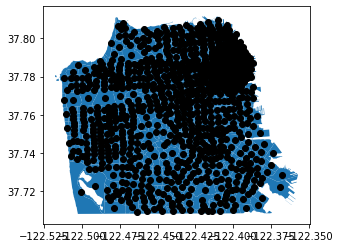

In [28]:
ax = gdf[Net.GEOMETRY.value].plot()
gdf[Net.CENTROIDS.value].plot(ax=ax, color="black")

In [29]:
rows_distances = []
for i in range(gdf.shape[0]):
    distances = []
    label = f"{gdf[Net.TAZ.value.upper()].iloc[i]}"
    centroid = gdf[Net.CENTROIDS.value].iloc[i]
    distances = gdf[Net.CENTROIDS.value].distance(centroid)
    for idx, distance in enumerate(distances):
        ref_zip_code = gdf[Net.TAZ.value.upper()].iloc[i]
        other_zip_code = gdf[Net.TAZ.value.upper()].iloc[idx]
        rows_distances.append((ref_zip_code, other_zip_code, distance))
    #gdf[label] = distances

gdf_distance = gpd.GeoDataFrame(rows_distances, columns=[Net.SOURCE.value, Net.DESTINATION.value, Net.DISTANCE.value])

/var/folders/lk/f9788htd3zz7ym_g3009qc0w0000gn/T/ipykernel_7643/1777989608.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = gdf[Net.CENTROIDS.value].distance(centroid)


In [30]:
gdf.head(25)

,TAZ,geometry,area,boundary,centroids
0,1,"MULTIPOLYGON (((-122.41623 37.70833, -122.4159...",0.000009,"MULTILINESTRING ((-122.41623 37.70833, -122.41...",POINT (-122.41369 37.70949)
1,2,"MULTIPOLYGON (((-122.46892 37.70823, -122.4684...",0.000017,"MULTILINESTRING ((-122.46892 37.70823, -122.46...",POINT (-122.46369 37.70921)
2,3,"MULTIPOLYGON (((-122.42455 37.71010, -122.4241...",0.000013,"MULTILINESTRING ((-122.42455 37.71010, -122.42...",POINT (-122.42099 37.70978)
3,4,"MULTIPOLYGON (((-122.46091 37.71059, -122.4594...",0.000015,"MULTILINESTRING ((-122.46091 37.71059, -122.45...",POINT (-122.45687 37.70948)
4,5,"MULTIPOLYGON (((-122.42008 37.70833, -122.4200...",0.000010,"MULTILINESTRING ((-122.42008 37.70833, -122.42...",POINT (-122.41665 37.70984)
5,6,"MULTIPOLYGON (((-122.41236 37.70833, -122.4122...",0.000021,"MULTILINESTRING ((-122.41236 37.70833, -122.41...",POINT (-122.40849 37.70988)
6,7,"MULTIPOLYGON (((-122.42224 37.71132, -122.4221...",0.000008,"MULTILINESTRING ((-122.42224 37.71132, -122.42...",POINT (-122.41891 37.71148)
7,8,"MULTIPOLYGON (((-122.43699 37.71075, -122.4360...",0.000015,"MULTILINESTRING ((-122.43699 37.71075, -122.43...",POINT (-122.43371 37.71017)
8,9,"MULTIPOLYGON (((-122.45562 37.71107, -122.4556...",0.000012,"MULTILINESTRING ((-122.45562 37.71107, -122.45...",POINT (-122.45255 37.71066)
9,10,"MULTIPOLYGON (((-122.46257 37.71137, -122.4625...",0.000017,"MULTILINESTRING ((-122.46257 37.71137, -122.46...",POINT (-122.45905 37.71194)


In [31]:
gdf[gdf[Net.TAZ.value.upper()]==1]

,TAZ,geometry,area,boundary,centroids
0,1,"MULTIPOLYGON (((-122.41623 37.70833, -122.4159...",0.000009,"MULTILINESTRING ((-122.41623 37.70833, -122.41...",POINT (-122.41369 37.70949)


In [32]:
gdf_distance.head()


,src,dst,distance
0,1,1,0.000000
1,1,2,0.049998
2,1,3,0.007301
3,1,4,0.043181
4,1,5,0.002981


In [33]:
gdf_distance.shape

(938961, 3)

In [34]:
gdf_distance[gdf_distance[Net.SOURCE.value]==1]

,src,dst,distance
0,1,1,0.000000
1,1,2,0.049998
2,1,3,0.007301
3,1,4,0.043181
4,1,5,0.002981
...,...,...,...
964,1,980,0.114981
965,1,768,0.077814
966,1,981,0.079870
967,1,808,0.088283


In [35]:
gdf_distance_ordered = gdf_distance.sort_values(by=[Net.SOURCE.value, Net.DISTANCE.value])

In [36]:
gdf_distance_ordered.head()

,src,dst,distance
0,1,1,0.000000
4,1,5,0.002981
16,1,17,0.003519
5,1,6,0.005218
6,1,7,0.005587


In [37]:
def label_distance(row):
    if row[Net.DISTANCE.value] <= 0.030:
        return Ride.SHORT.value
    if row[Net.DISTANCE.value] <= 0.060:
        return Ride.NORMAL.value
    if row[Net.DISTANCE.value] <= 0.09:
        return Ride.LONG.value
    if row[Net.DISTANCE.value] > 0.09:
        return Ride.EXTREME.value

In [38]:
gdf_distance_ordered[Net.LENGTH.value] = gdf_distance_ordered.apply(lambda x: label_distance(x), axis=1)

In [39]:
gdf_distance_ordered[gdf_distance_ordered[Net.SOURCE.value]==1]

,src,dst,distance,length
0,1,1,0.000000,short
4,1,5,0.002981,short
16,1,17,0.003519,short
5,1,6,0.005218,short
6,1,7,0.005587,short
...,...,...,...,...
684,1,689,0.115365,extreme
290,1,291,0.116794,extreme
732,1,737,0.117503,extreme
733,1,738,0.117814,extreme


In [40]:
distance_dict = {}
for k, row in gdf_distance_ordered.iterrows():
    if not row[Net.SOURCE.value] in distance_dict:
        distance_dict[row[Net.SOURCE.value]] = {
            Ride.SHORT.value: [],
            Ride.NORMAL.value: [],
            Ride.LONG.value: [],
            Ride.EXTREME.value: []
        }
    distance_dict[row[Net.SOURCE.value]][row[Net.LENGTH.value]].append(str(row[Net.DESTINATION.value]))

In [41]:
output_absolute_path_to_file = utils.generate_absolute_path_to_file(
    Paths.CENTROIDS_TAZ,
    FileName.CENTROIDS,
    FileFormat.CSV,
    Dataset.SFCTA,
    City.SAN_FRANCISCO
)
utils.check_path_exists(output_absolute_path_to_file, is_path_file=True)
gdf_distance_ordered.to_csv(output_absolute_path_to_file, index=False)

In [42]:
output_absolute_path_to_file = utils.generate_absolute_path_to_file(
    Paths.CENTROIDS_TAZ,
    FileName.CENTROIDS,
    FileFormat.JSON,
    Dataset.SFCTA,
    City.SAN_FRANCISCO
)
utils.check_path_exists(output_absolute_path_to_file, is_path_file=True)
utils.export_file_from_absolute_path(output_absolute_path_to_file, FileFormat.JSON, distance_dict)